In [30]:
from IPython.display import Image
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# inline plotting instead of popping out
%matplotlib inline

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
!pip install lib
from lib import *

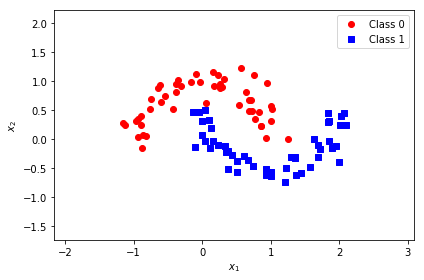

In [31]:
#Nonlinearly Separable Classes
#Sometimes, the classes in a dataset may be nonlinearly separable. 
#A famous synthetic dataset in this category, called the two-moon dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig-two-moon.png', dpi=300)
plt.show()

[Perceptron]
Misclassified samples: 3
Accuracy: 0.85


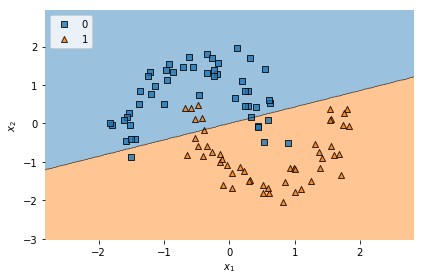

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Logistic regression]
Misclassified samples: 3
Accuracy: 0.85


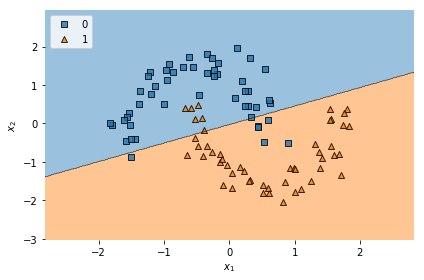

In [32]:
#If we apply linear classifiers such as Perceptron or Logistic Regression to this dataset, 
#it is not possible to get a reasonable decision boundary:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('[Perceptron]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for Perceptron
plot_decision_regions(X_combined_std, y_combined,
                      clf=ppn, 
                      filler_feature_ranges=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('fig-two-moon-perceptron-boundray.png', dpi=300)
plt.show()

lr = LogisticRegression(C=1000.0, random_state=0)
#C default 1.0，為正規化係數λ的倒數，必需是正數!(反正規化)。值愈小，則正規化越高。
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('[Logistic regression]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for LogisticRegression
plot_decision_regions(X_combined_std, y_combined,
                      clf=lr, 
                      filler_feature_ranges=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('fig-two-moon-logistic-regression-boundray.png', dpi=300)
plt.show()
#the models are too simple to capture the shape of true boundary, introducing a large bias

# **K-Nearest Neighbors Classifier**
The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:



1.   Choose K (the number of neighbors), and a distance metric;
2.   Find the K nearest neighbors of the data point that we want to classify;
3.   Assign the class label by majority vote.

KNN is a typical example of a **lazy** learner. It is called lazy because it simply memorizes the training dataset in the training phase and learns a discriminative function f only before making a prediction.

[KNN]
Misclassified samples: 1
Accuracy: 0.95


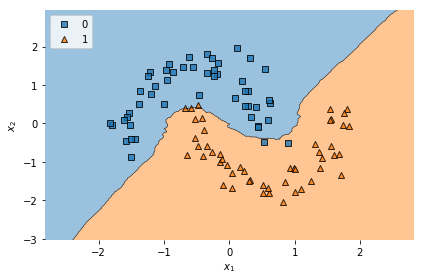

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# p=2 and metric='minkowski' means the Euclidean Distance, K=n_neighbors=11
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      clf=knn, 
                      filler_feature_ranges=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('fig-two-moon-knn-boundray.png', dpi=300)
plt.show()

**advantage** of such a memory-based approach is that the classifier **immediately adapts** as we collect new training data.

However, the **downside** is that the **computational complexity for classifying new points** grows linearly with the **number of samples in the training dataset** in the worst-case scenario, unless the dataset has very few dimensions (features) and the algorithm has been implemented using efficient data structures such as KD-trees, an algorithm for finding best matches in logarithmic expected time. Furthermore, **we can't discard training samples since no training step is involved**. Thus, **storage space** can become a challenge if we are working with large datasets.

### Support Vector Classifier
Another powerful and widely used memory-based classifier is the nonlinear support vector classifier (SVC). Like KNN, nonlinear SVC makes predictions by the weighted average of the labels of similar examples (measured by a kernel function). However, only the **support vectors**, i.e., examples falling onto or inside the margin, can have positive weights and need to be remembered. In practice, SVC usually remembers much fewer examples than KNN does. Another difference is that SVC is not an lazy learner---the weights are trained eagerly in the training phase.

[Linear SVC]
Misclassified samples: 3
Accuracy: 0.85


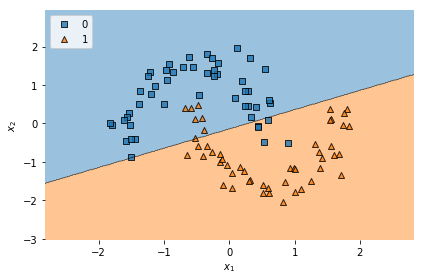

[Nonlinear SVC]
Misclassified samples: 1
Accuracy: 0.95


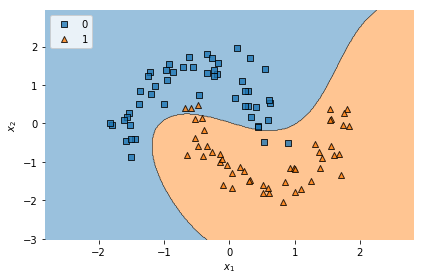

In [34]:
from sklearn.svm import SVC
# kernel: the kernel function, can be 'linear', 'poly', 'rbf', ...etc
# C is the hyperparameter for the error penalty term
#C maximizing margin and minimizing slacks
svm_linear = SVC(kernel='linear', C=1000.0, random_state=0)

svm_linear.fit(X_train_std, y_train)
y_pred = svm_linear.predict(X_test_std)
print('[Linear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for linear svm
plot_decision_regions(X_combined_std, y_combined,
                      clf=svm_linear, 
                      filler_feature_ranges=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figtwo-moon-svm-linear-boundray.png', dpi=300)
plt.show()

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm_rbf = SVC(kernel='rbf', random_state=0, gamma=0.2, C=10.0)

svm_rbf.fit(X_train_std, y_train)
y_pred = svm_rbf.predict(X_test_std)
print('[Nonlinear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for rbf svm
plot_decision_regions(X_combined_std, y_combined,
                      clf=svm_rbf, 
                      filler_feature_ranges=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('fig-two-moon-svm-rbf-boundray.png', dpi=300)
plt.show()

In [35]:
print('[Nonlinear SVC: C=1000, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1000.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=1, gamma=0.0001]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.0001, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Nonlinear SVC: C=1000, gamma=0.01]
Misclassified samples: 3
Accuracy: 0.85

[Nonlinear SVC: C=1, gamma=0.0001]
Misclassified samples: 11
Accuracy: 0.45


### Tuning Hyperparameters via Grid Search
In SVC, there is no simple way to relate a particular hyperparameter combination (C,γ) to the model complexity. So, we have to **try out all possible (or specified) combinations exhaustively** in order to pick the best one. This procedure is called **grid search**:

In [36]:
from sklearn.model_selection import GridSearchCV
param_C = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
param_gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

svm = SVC(random_state=0)

# set the param_grid parameter of GridSearchCV to a list of dictionaries
param_grid = [{'C': param_C, 
               'gamma': param_gamma, 
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9875
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



[Nonlinear SVC: grid search]
Test accuracy: 1.00


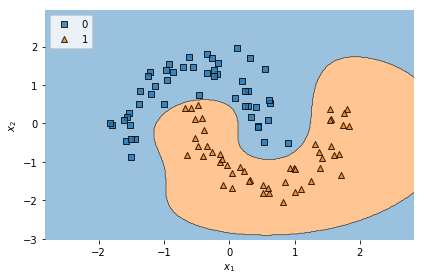

In [37]:
clf = gs.best_estimator_
clf.fit(X_train_std, y_train)
print('\n[Nonlinear SVC: grid search]')
print('Test accuracy: %.2f' % clf.score(X_test_std, y_test))

# plot decision regions for rbf svm
plot_decision_regions(X_combined_std, y_combined,
                      clf=gs.best_estimator_, 
                      filler_feature_ranges=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('fig-two-moon-svm-rbf-gs-boundray.png', dpi=300)
plt.show()

### Data Preprocessing
The quality of the data and the amount of useful information that it contains are key factors that determine how well a machine learning algorithm can learn. Therefore, it is critical that we make sure to examine and **preprocess** a dataset before we feed it to a learning algorithm. The dataset we use on next section is the Adult dataset.

In [38]:
import pandas as pd
import numpy as np

# we set sep=', ' since this dataset is not a regular csv file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'adult/adult.data', header=None, sep=', ', engine='python')

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
              'education-num', 'marital-status', 'occupation', 
              'relationship', 'race', 'sex', 'capital-gain', 
              'capital-loss', 'hours-per-week', 'native-country', 
              'label']

display(df.head(15))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### We can observe two things in this dataset:



1.   Many attributes are not numeric but categorical;
2.   There are missing values. For example, data point No.14 has a missing value on native-country.

Since most machine learning algorithms can only take datasets with numeric features and without missing values. We have to preprocess this dataset.

### Handling Categorical Data
Real-world datasets usually contain one or more categorical features. When we are talking about categorical data, we have to further distinguish between nominal and ordinal features. Ordinal features can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M. In contrast, nominal features don't imply any order. For example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

In the Adult dataset, there is no obvious feature that is ordinal. So we will only focus on nominal ones in this lab. We can use the **LabelEncoder in scikit-learn to help us encode categorical values into numerical values.**

In [39]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# encode label first
label_le = LabelEncoder()
df['label'] = label_le.fit_transform(df['label'].values)

# encode categorical features
catego_features = ['workclass', 'education', 'marital-status', 'occupation', 
                   'relationship', 'race', 'sex', 'native-country']

catego_le = LabelEncoder()

# transform categorical values into numerical values
# be careful that '?' will also be encoded
# we have to replace it to NaN in numerical
num_values = []
for i in catego_features:
    df[i] = catego_le.fit_transform(df[i].values)
    classes_list = catego_le.classes_.tolist()
    
    # store the total number of values
    num_values.append(len(classes_list))
    
    # replace '?' with 'NaN'
    if '?' in classes_list:
        idx = classes_list.index('?')
        df[i] = df[i].replace(idx, np.nan)

display(df.head(15))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39.0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39.0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39.0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39.0,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5.0,0
5,37,4.0,284582,12,14,2,4.0,5,4,0,0,0,40,39.0,0
6,49,4.0,160187,6,5,3,8.0,1,2,0,0,0,16,23.0,0
7,52,6.0,209642,11,9,2,4.0,0,4,1,0,0,45,39.0,1
8,31,4.0,45781,12,14,4,10.0,1,4,0,14084,0,50,39.0,1
9,42,4.0,159449,9,13,2,4.0,0,4,1,5178,0,40,39.0,1


### Dealing with Missing Data
It is common in real-world applications that our samples have missing values for various reasons in one or more attributes for various reasons. For example, there could have been an error in the data collection process, or certain measurements are not applicable, or particular fields could have been left blank intentionally in a survey, etc. We typically see missing values as the blank spaces, NaN, or question mark in our datasets.

Unfortunately, most computational tools are unable to handle such missing values or would produce unpredictable results if we simply ignored them. Therefore, it is crucial that we take care of those missing values before we proceed with further analyses.

First, we can use **isnull()** method **in Panda's Dataframe** to see how many missing values we have in Adult dataset:

In [40]:
# count the number of missing values per column
display(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64

For a larger dataset, it can be tedious to look for missing values manually; in this case, we can use the isnull() method to return a DataFrame with **Boolean values** that indicate whether a cell contains a numeric value (False) or if data is missing (True). Using the sum() method, we can then return the number of missing values per column.

Next, we discuss some different strategies to handle missing data.

### Eliminating Samples or Features with Missing Values

One of the easiest ways to deal with missing data is to simply remove the corresponding features (columns) or samples (rows) from the dataset entirely. We can call the **dropna()** method of Dataframe **to eliminate rows or columns**:

In [41]:
print(df.shape)

# drop rows with missing values
df_drop_row = df.dropna()
print(df_drop_row.shape)
#The dropna method supports several additional parameters that can come in handy:
print('Original: {}'.format(df.shape))

# drop columns with missing values
df_drop_col = df.dropna(axis=1)
print('Drop column: {}'.format(df_drop_col.shape))

# drop rows or columns where all values are NaN
df_drop_row_all = df.dropna(how='all')
print('Drop row all: {}'.format(df_drop_row_all.shape))

# keep rows that have at least 14 non-NaN values
df_drop_row_thresh = df.dropna(thresh=14)
print('Drop row 14: {}'.format(df_drop_row_thresh.shape))

# only drop rows where NaN appear in specific columns (here: 'occupation')
df_drop_row_occupation = df.dropna(subset=['occupation'])
print('Drop row occupation: {}'.format(df_drop_row_occupation.shape))

(32561, 15)
(30162, 15)
Original: (32561, 15)
Drop column: (32561, 12)
Drop row all: (32561, 15)
Drop row 14: (30725, 15)
Drop row occupation: (30718, 15)


Although the removal of missing data seems to be a convenient approach, it comes with certain disadvantages; for example, we may end up removing too many samples and have a small dataset, resulting in overfitting. Or, if we remove too many feature columns, we will run the risk of losing valuable relationship between features that our classifier needs to discriminate between classes.

### Imputing Missing Values

If we do not have a large dataset, the removal of samples or dropping of entire feature columns may not be feasible, because we could lose too much valuable information. An alternative way is to **use interpolation techniques to estimate the missing values from other training samples in the same dataset**. There are some common interpolation techniques we can use, such as **mean** imputation, **median** imputation, and **most frequent** imputation.


The Imputer class from scikit-learn provides a convenient way for imputation. Next, we use it to perform the most frequent imputation since the missing values in the Adult dataset are all categorical features:

In [42]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

df_impute = pd.DataFrame(imputed_data)
df_impute.columns = df.columns

display(df.head(15))
display(df_impute.head(15))

# check if there are still missing values
display(df_impute.isnull().sum())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39.0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39.0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39.0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39.0,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5.0,0
5,37,4.0,284582,12,14,2,4.0,5,4,0,0,0,40,39.0,0
6,49,4.0,160187,6,5,3,8.0,1,2,0,0,0,16,23.0,0
7,52,6.0,209642,11,9,2,4.0,0,4,1,0,0,45,39.0,1
8,31,4.0,45781,12,14,4,10.0,1,4,0,14084,0,50,39.0,1
9,42,4.0,159449,9,13,2,4.0,0,4,1,5178,0,40,39.0,1


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39.0,7.0,77516.0,9.0,13.0,4.0,1.0,1.0,4.0,1.0,2174.0,0.0,40.0,39.0,0.0
1,50.0,6.0,83311.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,39.0,0.0
2,38.0,4.0,215646.0,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0,0.0
3,53.0,4.0,234721.0,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0,0.0
4,28.0,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0,0.0
5,37.0,4.0,284582.0,12.0,14.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40.0,39.0,0.0
6,49.0,4.0,160187.0,6.0,5.0,3.0,8.0,1.0,2.0,0.0,0.0,0.0,16.0,23.0,0.0
7,52.0,6.0,209642.0,11.0,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,45.0,39.0,1.0
8,31.0,4.0,45781.0,12.0,14.0,4.0,10.0,1.0,4.0,0.0,14084.0,0.0,50.0,39.0,1.0
9,42.0,4.0,159449.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,5178.0,0.0,40.0,39.0,1.0


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

### One-Hot Encoding
If we stop at this point and feed the array to our classifier, we will make one of the most common **mistakes** in dealing with categorical data. Take the 'workclass' for example, we will assume that 'State-gov' is larger than 'Self-emp-not-inc', and 'Self-emp-not-inc' is larger than 'Private'. This **incorrect assumption can lead to degraded performance**. For example, if a model uses weight decay for regularization, it may prefer categorical values that are encoded closer to 0.

A common workaround for this problem is to use a technique called **one-hot encoding**. The idea behind this approach is to **create a new dummy feature column for each unique value in the nominal feature**. To perform this transformation, we can use the **OneHotEncoder from Scikit-learn**:

In [43]:
from sklearn.preprocessing import OneHotEncoder

# we perform one-hot encoding on both impute data and drop-row data
impute_data = df_impute.values
drop_row_data = df_drop_row.values

# find the index of the categorical feature
catego_features_idx = []
for fea in catego_features:
    catego_features_idx.append(df.columns.tolist().index(fea))

# give the column index you want to do one-hot encoding
ohe = OneHotEncoder(categorical_features = catego_features_idx, sparse=False)

impute_onehot_data = ohe.fit_transform(impute_data)
print('Impute: {}'.format(impute_data.shape))
print('Impute one-hot: {}'.format(impute_onehot_data.shape))

drop_row_onehot_data = ohe.fit_transform(drop_row_data)
print('Drop row: {}'.format(drop_row_data.shape))
print('Drop row one-hot: {}'.format(drop_row_onehot_data.shape))

Impute: (32561, 15)
Impute one-hot: (32561, 106)
Drop row: (30162, 15)
Drop row one-hot: (30162, 105)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data w

Here, we can see that the numbers of column on both dataset increase significantly. Note that the number of columns between impute_onehot_data and drop_row_onehot_data are different, which implies that **the drop-row method makes a value in a column disappear, resulting in loss of information**.

NOTE: by default, the OneHotEncoder returns a sparse matrix when we use the transform() method. Sparse matrices save space to store entries with a lot of zeros.

### The get_dummies() Method in Pandas
An alternative, but more convenient way to **create dummy features** via one-hot encoding is to use the **get_dummies() method implemented in Pandas.**

NOTE: the get_dummies() method will **only convert string columns and leave all other columns unchanged**. If you want to use this method, **you have to ensure that the categorical data are all string**. Otherwise it will not perform encoding.

In [44]:
df_dummy = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'adult/adult.data',
                 header=None, sep=', ', engine='python')

df_dummy.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                    'education-num', 'marital-status', 'occupation', 
                    'relationship', 'race', 'sex', 'capital-gain', 
                    'capital-loss', 'hours-per-week', 'native-country', 
                    'label']

# encode label first
label_le = LabelEncoder()
df_dummy['label'] = label_le.fit_transform(df_dummy['label'].values)

# remove rows with missing data
df_dummy = df_dummy.replace('?', np.nan)
df_dummy_drop_row = df_dummy.dropna()
# here we cannot use sklearn.Imputer, since it only accepts numerical values

# one-hot encoding
df_dummy_drop_row = pd.get_dummies(df_dummy_drop_row)
display(df_dummy_drop_row.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scikit-learn Pipeline
When we applied different preprocessing techniques in the previous labs, such as standardization, data preprocessing, or PCA, you learned that we have to reuse the parameters that were obtained during the fitting of the training data to scale and compress any new data, for example, the samples in the separate test dataset. **Scikit-learn Pipeline allows us to fit a model including an arbitrary number of transformation steps and apply it to make predictions about new data.**
![替代文字](https://i.imgur.com/lkQV1gG.png)

In [45]:
#we give an example on how to combine Imputer and OneHotEncoder with KNN or SVM:
from sklearn.pipeline import Pipeline

df_small = df.sample(n=4000, random_state=0)

X = df_small.drop('label', axis=1).values
y = df_small['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# define pipeline with an arbitrary number of transformer in a tuple array
pipe_knn = Pipeline([('imr', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
                     ('ohe', OneHotEncoder(categorical_features=catego_features_idx, 
                                           n_values=num_values, sparse=False)),
                     ('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))])

pipe_svm = Pipeline([('imr', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
                     ('ohe', OneHotEncoder(categorical_features=catego_features_idx, 
                                           n_values=num_values, sparse=False)),
                     ('scl', StandardScaler()),
                     ('clf', SVC(kernel='rbf', random_state=0, gamma=0.001, C=100.0))])

# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWa

[KNN]
Misclassified samples: 158
Accuracy: 0.8025


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)



[SVC]
Misclassified samples: 134
Accuracy: 0.8325


In [46]:
#check whether one-hot encoding is useful or not:
pipe_knn = Pipeline([('imr', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
                     ('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))])

pipe_svm = Pipeline([('imr', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
                     ('scl', StandardScaler()),
                     ('clf', SVC(kernel='rbf', random_state=0, gamma=0.001, C=100.0))])

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN: no one-hot]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC: no one-hot]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[KNN: no one-hot]
Misclassified samples: 156
Accuracy: 0.8050

[SVC: no one-hot]
Misclassified samples: 151
Accuracy: 0.8113


As we can see, the performance of KNN does not change much because the model does not prefer specific numerical values. On the other hand, the performance of SVC dropped because it has a weight decay term in the cost function that can be misled when the categorical features are not encoded as one-hot vectors.

We can also compare the performance between imputation and dropping rows:

In [47]:
# keep only data points without NaN features
idx = np.isnan(X_train).sum(1) == 0
X_train = X_train[idx]
y_train = y_train[idx]
idx = np.isnan(X_test).sum(1) == 0
X_test = X_test[idx]
y_test = y_test[idx]

pipe_knn = Pipeline([('ohe', OneHotEncoder(categorical_features = catego_features_idx, 
                                           n_values = num_values, sparse=False)),
                     ('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))])

pipe_svm = Pipeline([('ohe', OneHotEncoder(categorical_features = catego_features_idx, 
                                           n_values = num_values, sparse=False)),
                     ('scl', StandardScaler()),
                     ('clf', SVC(kernel='rbf', random_state=0, gamma=0.001, C=100.0))])

# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN: drop row]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC: drop row]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


[KNN: drop row]
Misclassified samples: 148
Accuracy: 0.8008


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)



[SVC: drop row]
Misclassified samples: 126
Accuracy: 0.8304


In [48]:
#let's combine SVC pipeline with grid search:
pipe_svm = Pipeline([('ohe', OneHotEncoder(categorical_features = catego_features_idx, 
                                           n_values = num_values, sparse=False)),
                     ('scl', StandardScaler()),
                     ('clf', SVC(random_state=0))])

param_gamma = [0.0001, 0.001, 0.01, 0.1, 1.0]
param_C = [0.1, 1.0, 10.0, 100.0]

# here you can set parameter for different steps 
# by adding two underlines (__) between step name and parameter name
param_grid = [{'clf__C': param_C, 
               'clf__kernel': ['linear']},
              {'clf__C': param_C, 
               'clf__gamma': param_gamma, 
               'clf__kernel': ['rbf']}]

# set pipe_svm as the estimator
gs = GridSearchCV(estimator=pipe_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_train, y_train)
print('[SVC: grid search]')
print('Validation accuracy: %.3f' % gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is depr

[SVC: grid search]
Validation accuracy: 0.835
{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Test accuracy: 0.830
